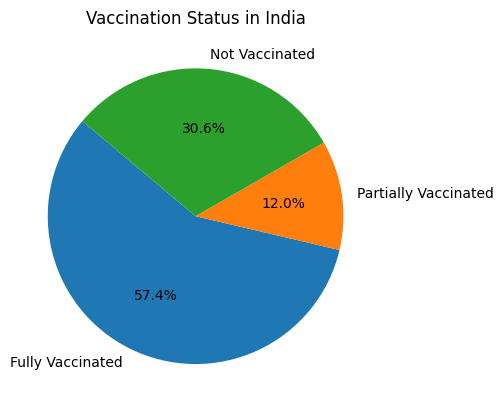

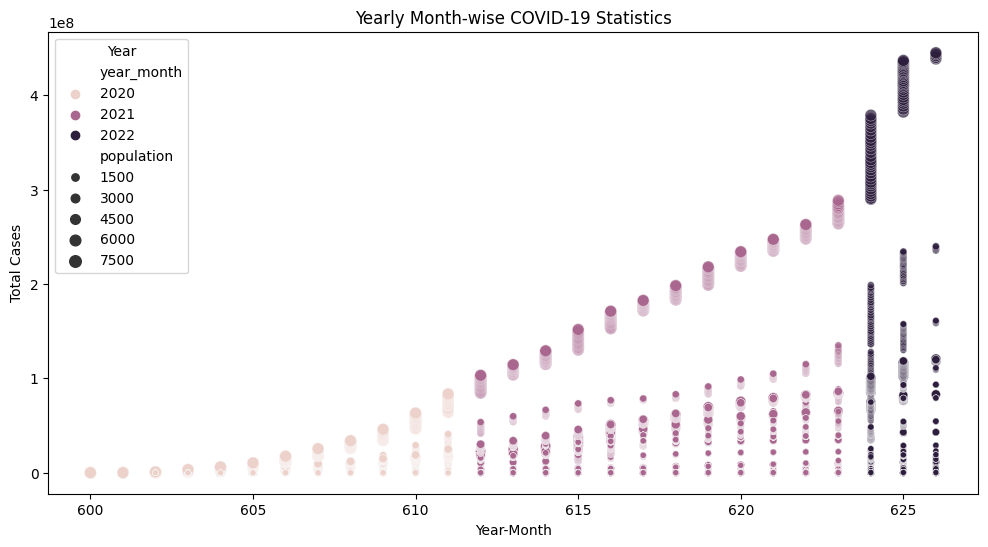

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

file_path = r'C:\Users\meena\Downloads\owid-covid-data.csv\owid-covid-data.csv'
covid_data = pd.read_csv(file_path)

india_data = covid_data[covid_data['location'] == 'India']

covid_data['year_month'] = pd.to_datetime(covid_data['date']).dt.to_period('M')

covid_data['year_month_numeric'] = covid_data['year_month'].apply(lambda x: x.ordinal)

def draw_pie_chart(labels, sizes, title,figsize=(12, 6)):
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

vaccination_labels = ['Fully Vaccinated', 'Partially Vaccinated', 'Not Vaccinated']
vaccination_sizes = [
    india_data['people_fully_vaccinated'].max(),
    india_data['people_vaccinated'].max() - india_data['people_fully_vaccinated'].max(),
    india_data['population'].max() - india_data['people_vaccinated'].max()
]
draw_pie_chart(vaccination_labels, vaccination_sizes, 'Vaccination Status in India')

def draw_bubble_plot(x, y, size, title, xlabel, ylabel, hue, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, size=size, hue=hue, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Year')
    plt.show()

draw_bubble_plot(x=covid_data['year_month_numeric'],
                 y=covid_data['total_cases'],
                 size=covid_data['population'] / 1000000,
                 title='Yearly Month-wise COVID-19 Statistics',
                 xlabel='Year-Month',
                 ylabel='Total Cases',
                 hue=covid_data['year_month'].dt.year,
                 figsize=(12, 6))  

def draw_bar_graph(data, title, xlabel, ylabel, height=2000, width=600):
    data = data.copy()  
    data['year'] = pd.to_datetime(data['date']).dt.year  
    data['month'] = pd.to_datetime(data['date']).dt.month_name()  
    fig = px.bar(data, x='location', y='total_cases', color='location',
                 title=title, labels={'total_cases': ylabel, 'location': xlabel},
                 facet_row='month', facet_col='year')
    fig.update_layout(height=height, width=width)
    fig.show()


draw_bar_graph(india_data, 'Total Cases by year-month', '', 'Total Cases', height=2000, width=600)